## Logistic Regression/classification

We will be working on adult dataset of US census. Dataset can be obtained from 

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
The aim of this analysis is to find whether the salary is >$50K or <$50K

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataset doesn't have a header. So, obtained the header from the description

In [64]:
colmn=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']

In [65]:
adult=pd.read_csv('C:\\Users\\sagar\\Documents\\GitHub\\ML\\Classification_adult\\adult_train.txt',names=colmn,index_col=False)
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


removing the nulls. Waste of analysis

In [112]:
adult.replace(to_replace=' ?',value=np.NaN,inplace=True)
adult.dropna(subset=['workclass'],inplace=True)
adult.dropna(subset=['occupation'],inplace=True)
adult.dropna(subset=['native_country'],inplace=True)

let's check the frequency of the column, i mean histogram/pie chart before going into further details

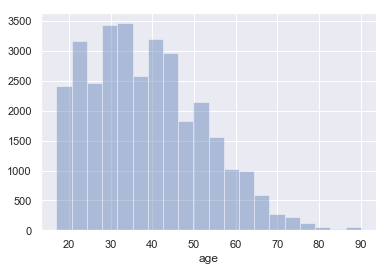

In [83]:
sns.distplot(adult['age'], bins=20, kde=False,rug=False)
plt.show()

inference: There are very less records from age 70 onwards. Can consider them as different set

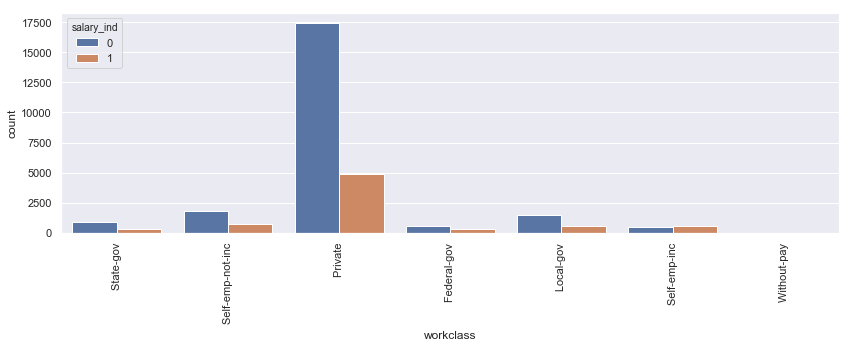

In [113]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="workclass", data=adult,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Inference: without pay and never worked doesn't or very minimal salaries. so they can be ignored for processing

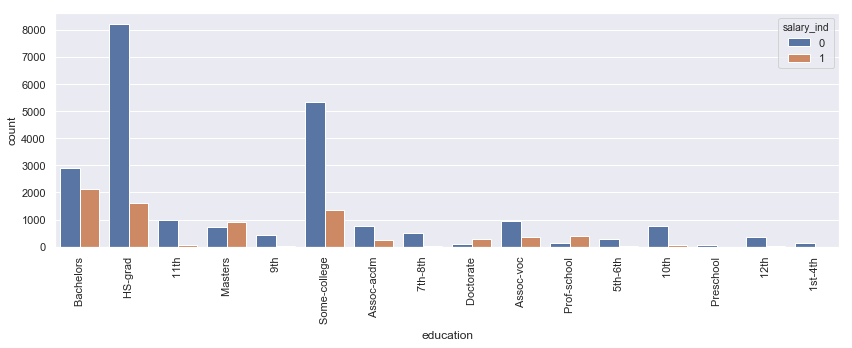

In [114]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="education", data=adult,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Inference: HS-Grad forms the major share, but bachelors, some-college also include good amount of populace, rest are small numbers

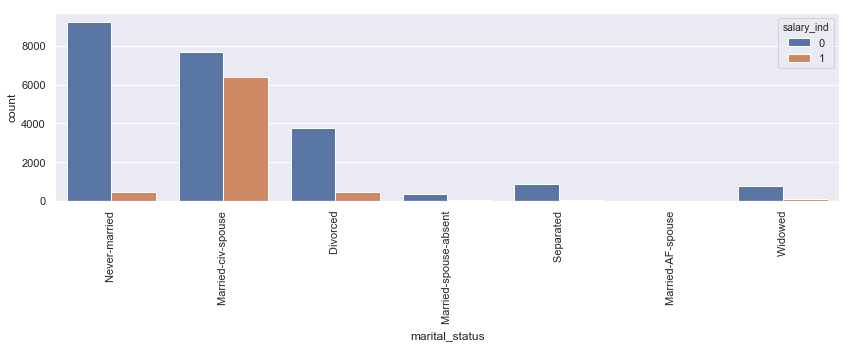

In [115]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="marital_status", data=adult,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Let's change the categorical columns into numbers and see

In [66]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

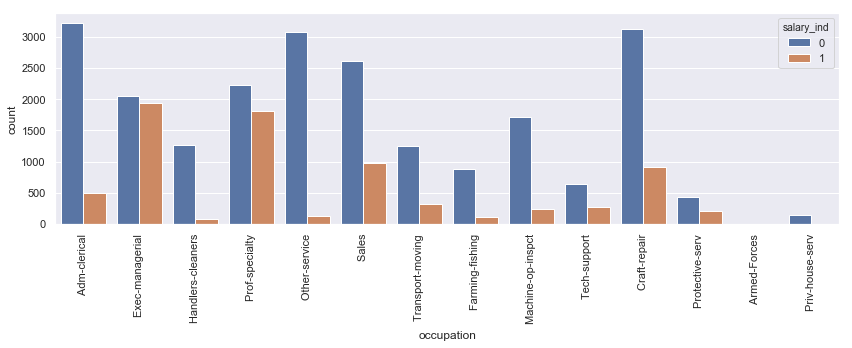

In [116]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="occupation", data=adult,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

armed forces have less number of records/no higher salaries

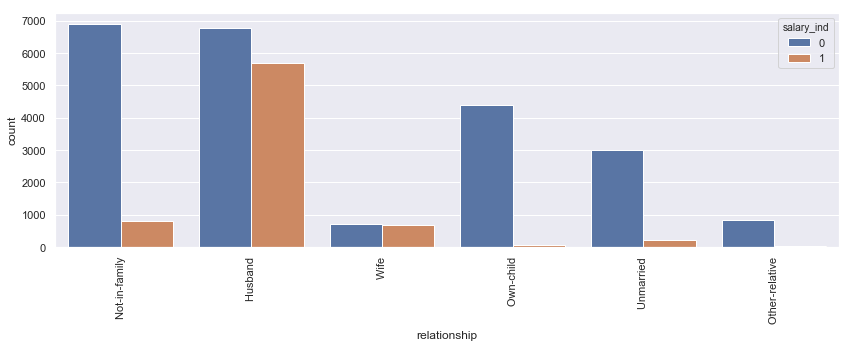

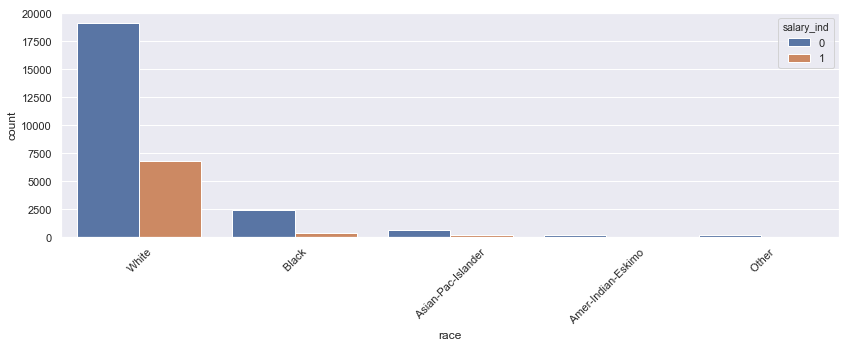

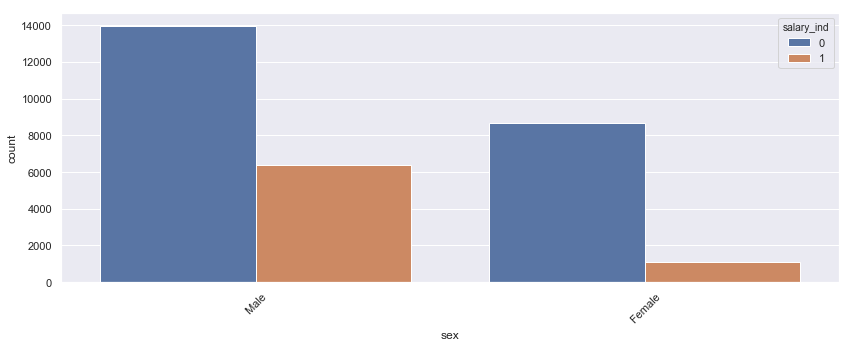

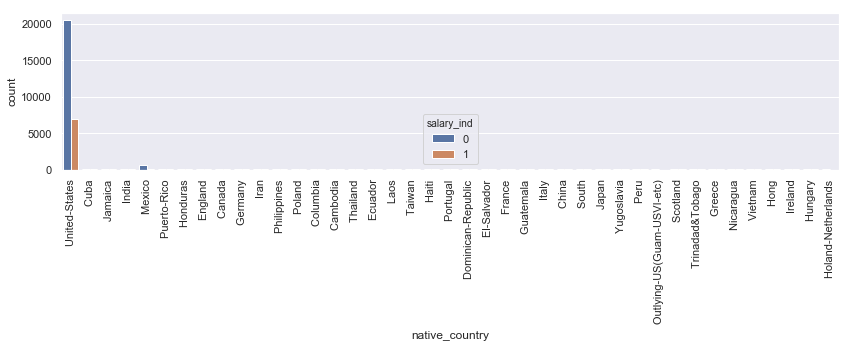

In [119]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="relationship", data=adult,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="race", data=adult,hue='salary_ind')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="sex", data=adult,hue='salary_ind')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="native_country", data=adult,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


US has to be treated separately and rest all the countries have to be treated separately

In [ ]:
adult['workclass_ind' ] =pd.Categorical(adult.workclass).codes
adult['education_ind' ] =pd.Categorical(adult.education).codes
adult['marital_status_ind' ] =pd.Categorical(adult.marital_status).codes
adult['occupation_ind' ] =pd.Categorical(adult.occupation).codes
adult['relationship_ind' ] =pd.Categorical(adult.relationship).codes
adult['race_ind' ] =pd.Categorical(adult.race).codes
adult['native_country_ind' ] =pd.Categorical(adult.native_country).codes
adult['salary_ind' ] =pd.Categorical(adult.salary).codes

In [71]:
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,salary,workclass_ind,education_ind,marital_status_ind,occupation_ind,relationship_ind,race_ind,native_country_ind,salary_ind
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,7,9,4,1,1,4,39,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,6,9,2,4,0,4,39,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,4,11,0,6,1,4,39,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,4,1,2,6,0,2,39,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,4,9,2,10,5,2,5,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,United-States,<=50K,4,12,2,4,5,4,39,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,Jamaica,<=50K,4,6,3,8,1,2,23,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,>50K,6,11,2,4,0,4,39,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,United-States,>50K,4,12,4,10,1,4,39,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,>50K,4,9,2,4,0,4,39,1


Let's eliminate the non-numeric columns and create a new dataset to be used 

In [85]:
adult.dtypes

age                    int64
workclass             object
fnlwgt                 int64
education             object
education_num          int64
marital_status        object
occupation            object
relationship          object
race                  object
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
salary                object
workclass_ind           int8
education_ind           int8
marital_status_ind      int8
occupation_ind          int8
relationship_ind        int8
race_ind                int8
native_country_ind      int8
salary_ind              int8
dtype: object

filter only int datatypes using the below code

In [90]:
adult_num=adult.select_dtypes(include=['int8','int64'])

create a heat map with the variables keeping the target variable as salary_ind

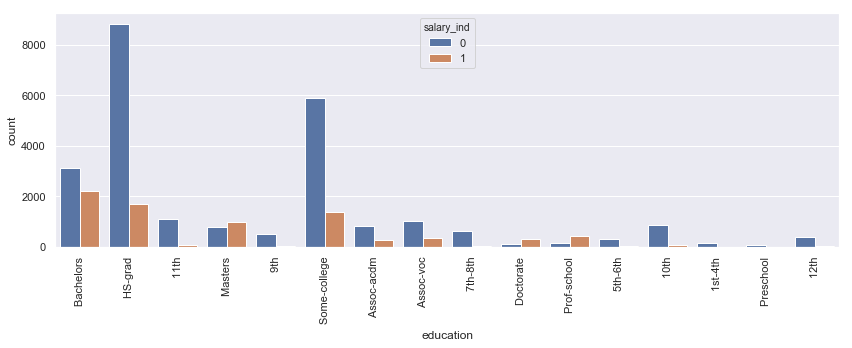

In [98]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x="education", data=adult,hue='salary_ind')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

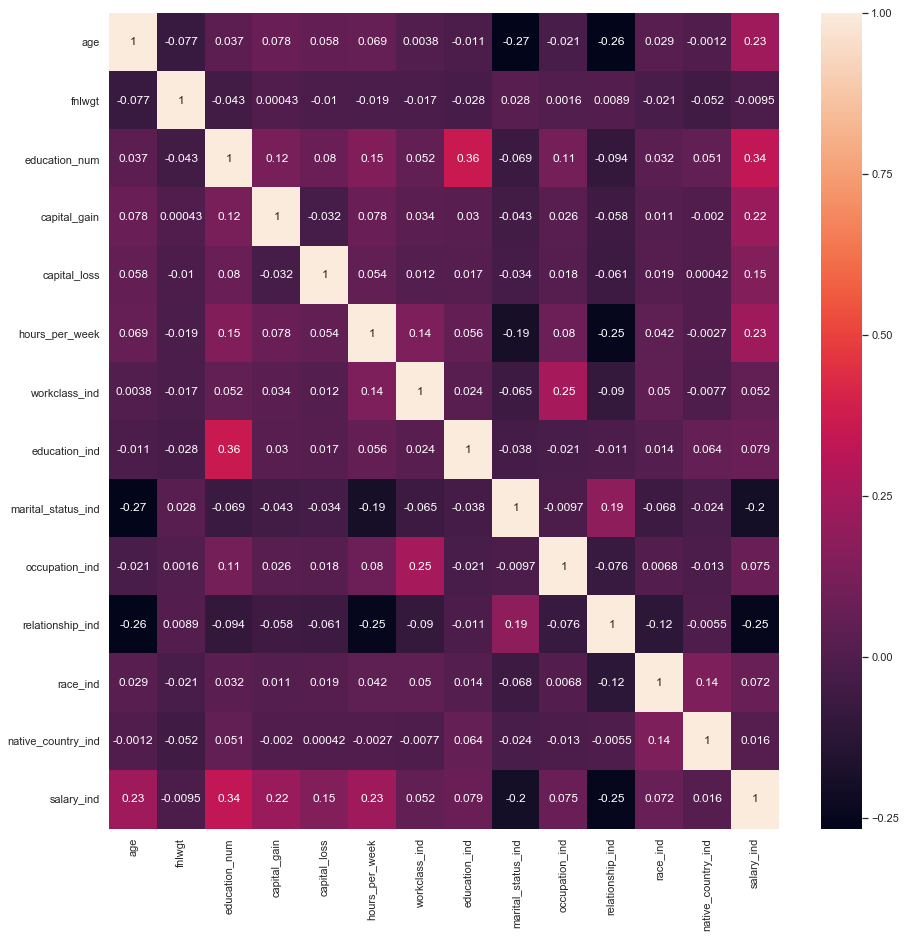

In [128]:
corr = adult_num.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
plt.show()